1.0
[[0. 2.]
 [2. 0.]]
[2 1]
[3.70710678 1.41421356] [ 2.29289322 -1.41421356]
0.3535533905932738


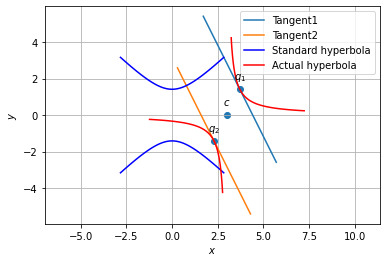

In [42]:
#Program to plot  the tangent of a hyperbola
#Code by GVV Sharma
#Released under GNU GPL
#August 9, 2020

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

import sys                                          #for path to external scripts
sys.path.insert(0, '/storage/emulated/0/tlc/school/ncert/linman/codes/CoordGeo')        #path to my scripts
#setting up plot
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
len = 100
y = np.linspace(-2,2,len)
#hyper parameters
V = 1/2*np.array(([0,1],[1,0]))
u = -3/2*np.array(([0,1]))
f = -1
Vinv = LA.inv(V)
#Eigenvalues and eigenvectors
D_vec,P = LA.eig(V)
D = np.diag(D_vec)
#print(D,P)
uconst = u.T@Vinv@u-f
a = np.sqrt(np.abs(uconst/D_vec[0]))
b = np.sqrt(np.abs(uconst/D_vec[1]))
#print(a,b)
#Generating the Standard Hyperbola
def hyper_gen(y):
	x = np.sqrt(1+y**2)
	return x
x = hyper_gen(y)
xStandardHyperLeft = np.vstack((-x,y))
xStandardHyperRight = np.vstack((x,y))

#Affine Parameters
c = -Vinv@u
#print(c)
R =  np.array(([0,1],[1,0]))
ParamMatrix = np.array(([a,0],[0,b]))

#Generating the eigen hyperbola
xeigenHyperLeft = R@ParamMatrix@xStandardHyperLeft
xeigenHyperRight = R@ParamMatrix@xStandardHyperRight

#Generating the actual hyperbola
xActualHyperLeft = P@ParamMatrix@R@xStandardHyperLeft+c[:,np.newaxis]
xActualHyperRight = P@ParamMatrix@R@xStandardHyperRight+c[:,np.newaxis]


#Hyperbola vertices
V1old = np.array([1,0])
V2old = -V1old

V1 = P@R@ParamMatrix@V1old+c
V2 = P@R@ParamMatrix@V2old+c
print(uconst)

#Tangent Analysis
m = np.array(([1,-2]))
n = np.array(([2,1]))
#print(n)
print(Vinv)
print(n.T)
kappa = np.sqrt(uconst/(n.T@Vinv@n))
q1=Vinv@(kappa*n-u)
q2=Vinv@(-kappa*n-u)
print(q1,q2)
print(kappa)
def line_dir_pt(m,A,k1,k2):
  len = 50
  dim = A.shape[0]
  x_AB = np.zeros((dim,len))
  lam_1 = np.linspace(k1,k2,len)
  for i in range(len):
    temp1 = A + lam_1[i]*m
    x_AB[:,i]= temp1.T
  return x_AB
#Generating the tangents
k1 = 2
k2 = -2
x_AB = line_dir_pt(m,q1,k1,k2)
x_BC = line_dir_pt(m,q2,k1,k2)

#Labeling the coordinates
hyper_coords = np.vstack((q1,q2,c)).T
plt.scatter(hyper_coords[0,:], hyper_coords[1,:])
vert_labels = ['$q_1$','$q_2$','$c$']
for i, txt in enumerate(vert_labels):
    plt.annotate(txt, # this is the text
                 (hyper_coords[0,i], hyper_coords[1,i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


##Major and Minor Axes
#MajorStandard = np.array(([a,0]))
#MinorStandard = np.array(([0,b]))

#
##Plotting the standard hyperbola
#plt.plot(xStandardHyperLeft[0,:],xStandardHyperLeft[1,:],label='Standard hyperbola')
#plt.plot(xStandardHyperRight[0,:],xStandardHyperRight[1,:])

#Plotting all lines
plt.plot(x_AB[0,:],x_AB[1,:],label='Tangent1')
plt.plot(x_BC[0,:],x_BC[1,:],label='Tangent2')

#Plotting the eigen hyperbola
plt.plot(xeigenHyperLeft[0,:],xeigenHyperLeft[1,:],label='Standard hyperbola',color='b')
plt.plot(xeigenHyperRight[0,:],xeigenHyperRight[1,:],color='b')

#Plotting the actual hyperbola
plt.plot(xActualHyperLeft[0,:],-xActualHyperLeft[1,:],label='Actual hyperbola',color='r')
plt.plot(xActualHyperRight[0,:],-xActualHyperRight[1,:],color='r')
#
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid() # minor
plt.axis('equal')


#else
plt.show()